In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
tp_df = pd.read_excel("SimData_Transplant_Ver1.0.xls")
tp_df

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,A,home,Male,A,No,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1
1,Male,A,home,Male,A,Yes,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1
2,Male,AB,home,Male,A,No,511,51.127335,33.616883,27.273124,24.887090,7.680005,7.684472,815.728909,1
3,Male,B,home,Male,B,No,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1
4,Male,O,icu,Male,O,No,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,A,home,Female,A,No,179,66.435868,30.960044,24.850272,19.682428,12.620159,9.912282,4658.526132,1
3996,Male,O,inpt,Female,A,No,25,52.845865,71.273963,29.179275,32.437191,29.698726,29.692512,505.425267,1
3997,Male,A,inpt,Female,O,No,153,34.176371,28.217301,33.598114,23.537730,27.098878,29.459862,307.379955,1
3998,Female,O,home,Male,O,No,12,59.653318,36.775017,24.560432,18.579377,22.864374,24.288275,145.425581,0


In [3]:
tp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4000 non-null   object 
 1   Bloodtype        4000 non-null   object 
 2   Inpt_attx        4000 non-null   object 
 3   Donor_Sex        4000 non-null   object 
 4   Donor_Bloodtype  4000 non-null   object 
 5   Donor_DCD        4000 non-null   object 
 6   Waittime         4000 non-null   int64  
 7   Age_Tx           4000 non-null   float64
 8   Donor_Age        4000 non-null   float64
 9   TransplantBMI    4000 non-null   float64
 10  Donor_BMI        4000 non-null   float64
 11  MELD             4000 non-null   float64
 12  MELDNA           4000 non-null   float64
 13  Time             4000 non-null   float64
 14  Cens             4000 non-null   int64  
dtypes: float64(7), int64(2), object(6)
memory usage: 468.9+ KB


In [4]:
wl_df = pd.read_excel("SimData_WList_Ver1.0.xls")
wl_df

,Gender,Bloodtype,Inpt_attx,Age,BMI,MELD,MELDNA,Time,Cens
0,Female,B,home,61.085467,24.339517,10.655185,10.655894,1941.074915,1
1,Male,B,home,61.489707,27.424602,14.165872,12.658377,4.610223,1
2,Male,A,home,38.261000,25.562109,17.921970,26.669315,1108.553992,1
3,Male,O,inpt,36.191386,33.157785,34.993244,34.481114,1228.591710,1
4,Male,B,inpt,59.528581,26.426496,21.157155,19.292050,5981.142742,1
...,...,...,...,...,...,...,...,...,...
4995,Male,O,ventilated,18.452599,26.009412,33.244652,32.888834,6.180853,0
4996,Male,O,home,64.744593,26.688906,8.674914,8.674934,1152.335589,1
4997,Male,O,home,46.251465,32.578422,16.535037,19.861037,366.774015,1
4998,Male,AB,home,55.561647,24.147084,25.891168,26.378647,296.153015,0


In [5]:
test_df = pd.get_dummies(wl_df) 
test_df = test_df.drop(['Cens','Time'], axis=1)
for i in test_df:
    print(i)
test_df

Age
BMI
MELD
MELDNA
Gender_Female
Gender_Male
Bloodtype_A
Bloodtype_AB
Bloodtype_B
Bloodtype_O
Inpt_attx_home
Inpt_attx_icu
Inpt_attx_inpt
Inpt_attx_ventilated


,Age,BMI,MELD,MELDNA,Gender_Female,Gender_Male,Bloodtype_A,Bloodtype_AB,Bloodtype_B,Bloodtype_O,Inpt_attx_home,Inpt_attx_icu,Inpt_attx_inpt,Inpt_attx_ventilated
0,61.085467,24.339517,10.655185,10.655894,1,0,0,0,1,0,1,0,0,0
1,61.489707,27.424602,14.165872,12.658377,0,1,0,0,1,0,1,0,0,0
2,38.261000,25.562109,17.921970,26.669315,0,1,1,0,0,0,1,0,0,0
3,36.191386,33.157785,34.993244,34.481114,0,1,0,0,0,1,0,0,1,0
4,59.528581,26.426496,21.157155,19.292050,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18.452599,26.009412,33.244652,32.888834,0,1,0,0,0,1,0,0,0,1
4996,64.744593,26.688906,8.674914,8.674934,0,1,0,0,0,1,1,0,0,0
4997,46.251465,32.578422,16.535037,19.861037,0,1,0,0,0,1,1,0,0,0
4998,55.561647,24.147084,25.891168,26.378647,0,1,0,1,0,0,1,0,0,0


In [5]:
tp_df.MELD.unique

<bound method Series.unique of 0       13.967938
1       12.414717
2        7.680005
3       20.663905
4       25.454707
          ...    
3995    12.620159
3996    29.698726
3997    27.098878
3998    22.864374
3999     9.315963
Name: MELD, Length: 4000, dtype: float64>

I suppose, MELD and MELDNA are highly correlated, so if the model become complex and hard to simulate, we may ignore one of them.

<AxesSubplot:>

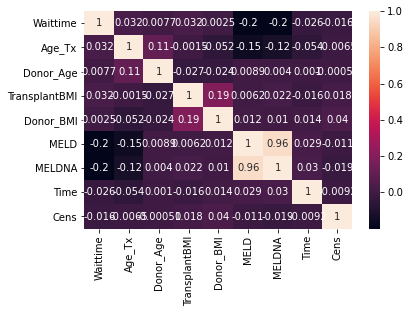

In [62]:
mat = tp_df.corr(method='pearson')
sns.heatmap(data=mat, cmap='RdYlGn', annot=True)

The distributions of MELD and MELDNA are similar

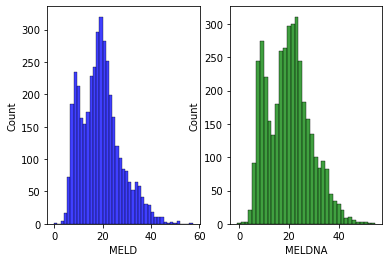

<AxesSubplot:xlabel='Time', ylabel='Count'>

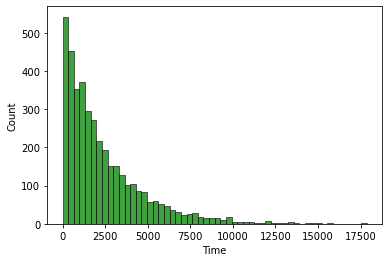

In [6]:
fig, ax = plt.subplots(1, 2)
p1 = sns.histplot(data=tp_df["MELD"], color = "blue", ax=ax[0])
p2 = sns.histplot(data=tp_df["MELDNA"], color = "green", ax=ax[1])
plt.show()
sns.histplot(data=tp_df["Time"], color = "green")

In [61]:
count = 0
for i in tp_df["Time"]:
    if i > 10000:
        count+=1
print(count)

51


In [54]:
for i in tp_df["Age_Tx"]:
    print(i)

56.55676042229573
60.818109987891624
51.12733532965968
53.782981184504905
78.05300059948465
51.66106412874886
66.52388492376173
58.89782097536872
63.89106004792674
44.20013338335299
47.99774996417985
49.57971894431966
38.85026959327554
53.543226153065774
40.615097901086095
61.2807903833983
52.56989288896917
55.67988906713434
57.013174409549855
31.792859881037664
51.55351303328533
46.43178566123974
64.4611953132571
39.95119184836433
61.6133803094624
53.616784171132636
33.47866355419514
45.351006127238314
52.47207199972812
70.45583091301924
64.79855329078906
51.29262890015285
48.306864430330506
57.67249580132063
58.44083871181098
67.56186464169701
59.29258188472322
54.62841911045769
72.33650880393432
35.30327295015583
57.744818134246216
58.214498691865
45.4944675067605
51.88103138377876
65.38457340487062
42.510464119096994
58.1506442482164
58.615433002774175
58.755265664728164
61.33285508602041
60.19180139023488
22.329287337828497
44.07354959119922
41.112683397716
58.93199150258489
42.08

49.83583152680067
49.272243026366
42.60074885946017
50.4243714537743
25.3156722453462
44.628259143780994
41.27810000641165
51.4735861928755
60.13890795094603
53.60084478821455
46.61476565647839
58.17871956116174
55.07429012601371
59.7430467064315
56.57895583223304
48.94234602769568
48.02655237422546
33.629514503322866
42.36815945530309
29.248205985430598
51.30527767105621
66.93765688706617
53.576211717074415
21.972623207394342
36.5777403364886
61.91330232835472
54.71078018385946
43.938308511131524
50.75837275427882
40.95336480016085
33.82999681396757
57.962141276260894
61.506928147769955
42.29332278666749
20.547095257317796
45.606994165512546
70.61264875708194
52.257261787785744
66.14384741876616
60.819769324763534
50.29090105502359
59.44747842376164
56.249753761763465
37.55157331444395
55.56068901060777
54.956784172256455
50.3699933808275
49.42595288606964
55.63912316827445
67.72798623797645
61.094256052552566
50.79528079450766
48.67557985814974
62.26628830239197
44.71503844484901
52.

45.619584119454
43.11092865504041
54.19716554577498
39.17281570449134
52.726973314099844
46.855009685071245
57.16986990471769
44.065951306985994
53.91324793482512
10.658623412889895
43.061408964102355
55.4252851998382
55.77378326560769
49.82280476296626
49.2271709904152
72.49223243281543
59.489998492776074
52.72907346709968
70.29937888014689
55.31054594334363
46.126703641094856
42.61849327078452
57.811432510070624
55.620316617136154
63.77867635524276
35.65901821725278
45.534771293322194
56.73965169028317
36.21448679238401
43.80636893001198
55.75380285173995
45.66435924400625
36.51071753889049
55.3283145723856
38.34983185402173
43.09500266958227
67.26746574178344
58.286950107448064
47.598313676685805
28.208019615443504
43.460192950647055
65.08022581941847
54.6359881708821
40.06743498907047
43.19870579039123
65.50188437900641
37.815135548167845
48.13801084046792
61.344385581238974
56.451382058608935
48.64408383577192
48.142675413469945
33.667437768994645
60.07191476506116
62.701772495184

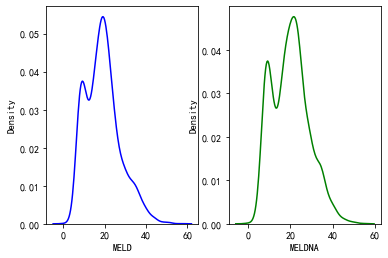

In [64]:
fig, ax = plt.subplots(1, 2)
p1 = sns.kdeplot(data=tp_df["MELD"], color = "blue", ax=ax[0])
p2 = sns.kdeplot(data=tp_df["MELDNA"], color = "green", ax=ax[1])
plt.show()

Linear relationship

<AxesSubplot:xlabel='MELD', ylabel='MELDNA'>

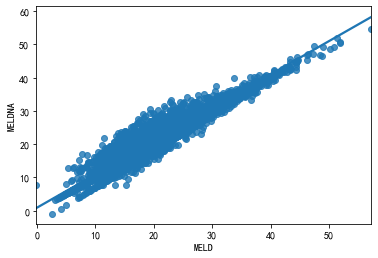

In [140]:
sns.regplot(x=tp_df["MELD"], y=tp_df["MELDNA"], data=tp_df)

Both have many extreme value

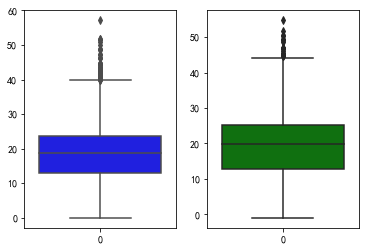

In [118]:
fig, ax = plt.subplots(1, 2)
p1 = sns.boxplot(data=tp_df["MELD"], color = "blue", ax=ax[0], )
p2 = sns.boxplot(data=tp_df["MELDNA"], color = "green", ax=ax[1])
plt.show()

It is true that they may have the similar impact on Survival Time and Waiting time. But there is no clear relationship between MELD score and Time.

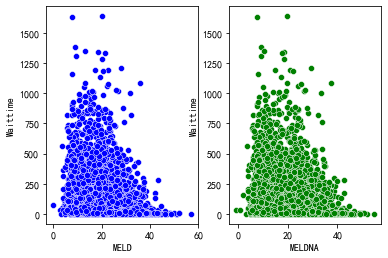

<Figure size 2304x2160 with 0 Axes>

In [166]:
fig, ax = plt.subplots(1, 2)
p1 = sns.scatterplot(x=tp_df["MELD"], y=tp_df["Waittime"], data=tp_df, color = "blue", ax = ax[0])
p2 = sns.scatterplot(x=tp_df["MELDNA"], y=tp_df["Waittime"], data=tp_df, color = "green", ax = ax[1])
plt.figure(figsize = (32,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5)
plt.show()

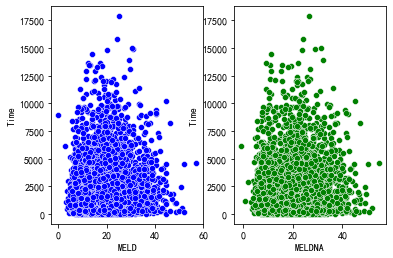

<Figure size 2304x2160 with 0 Axes>

In [124]:
fig, ax = plt.subplots(1, 2)
p1 = sns.scatterplot(x=tp_df["MELD"], y=tp_df["Time"],color = "blue", data=tp_df, ax= ax[0])
p2 = sns.scatterplot(x=tp_df["MELDNA"], y=tp_df["Time"], color = "green",data=tp_df, ax= ax[1])
plt.figure(figsize = (32,30))
plt.show()

In [44]:
from copy import deepcopy
df = deepcopy(tp_df)
df

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,Male,A,home,Male,A,No,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1
1,Male,A,home,Male,A,Yes,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1
2,Male,AB,home,Male,A,No,511,51.127335,33.616883,27.273124,24.887090,7.680005,7.684472,815.728909,1
3,Male,B,home,Male,B,No,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1
4,Male,O,icu,Male,O,No,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,A,home,Female,A,No,179,66.435868,30.960044,24.850272,19.682428,12.620159,9.912282,4658.526132,1
3996,Male,O,inpt,Female,A,No,25,52.845865,71.273963,29.179275,32.437191,29.698726,29.692512,505.425267,1
3997,Male,A,inpt,Female,O,No,153,34.176371,28.217301,33.598114,23.537730,27.098878,29.459862,307.379955,1
3998,Female,O,home,Male,O,No,12,59.653318,36.775017,24.560432,18.579377,22.864374,24.288275,145.425581,0


#  DATA Preprocessing

In [45]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
lb = LabelBinarizer()
for i in range(len(df)):
    # Converting Nominal to Numeric Attributes (map catergory to number)
    if df.loc[i,"Gender"] == "Male":
        df.loc[i,"Gender"] = 1
    if df.loc[i,"Gender"] == "Female":
        df.loc[i,"Gender"] = 0
    if df.loc[i,"Donor_Sex"] == "Male":
        df.loc[i,"Donor_Sex"] = 1
    if df.loc[i,"Donor_Sex"] == "Female":
        df.loc[i,"Donor_Sex"] = 0
    if df.loc[i,"Donor_DCD"] == "Yes":
        df.loc[i,"Donor_DCD"] = 1
    if df.loc[i,"Donor_DCD"] == "No":
        df.loc[i,"Donor_DCD"] = 0
df

,Gender,Bloodtype,Inpt_attx,Donor_Sex,Donor_Bloodtype,Donor_DCD,Waittime,Age_Tx,Donor_Age,TransplantBMI,Donor_BMI,MELD,MELDNA,Time,Cens
0,1,A,home,1,A,0,268,56.556760,41.002731,33.445563,31.358900,13.967938,14.861206,1770.322146,1
1,1,A,home,1,A,1,39,60.818110,30.997162,19.928849,22.484298,12.414717,14.542220,1432.093391,1
2,1,AB,home,1,A,0,511,51.127335,33.616883,27.273124,24.887090,7.680005,7.684472,815.728909,1
3,1,B,home,1,B,0,126,53.782981,39.580918,27.275657,33.181029,20.663905,21.302559,408.557233,1
4,1,O,icu,1,O,0,7,78.053001,51.286678,23.349091,28.348204,25.454707,24.021749,4676.209514,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,A,home,0,A,0,179,66.435868,30.960044,24.850272,19.682428,12.620159,9.912282,4658.526132,1
3996,1,O,inpt,0,A,0,25,52.845865,71.273963,29.179275,32.437191,29.698726,29.692512,505.425267,1
3997,1,A,inpt,0,O,0,153,34.176371,28.217301,33.598114,23.537730,27.098878,29.459862,307.379955,1
3998,0,O,home,1,O,0,12,59.653318,36.775017,24.560432,18.579377,22.864374,24.288275,145.425581,0


In [6]:
for i in test_df:
    print(i)

Age
BMI
MELD
MELDNA
Gender_Female
Gender_Male
Bloodtype_A
Bloodtype_AB
Bloodtype_B
Bloodtype_O
Inpt_attx_home
Inpt_attx_icu
Inpt_attx_inpt
Inpt_attx_ventilated


In [12]:
num_df = pd.get_dummies(tp_df) 
num_df = num_df.drop(['Cens'], axis=1)

train_df = num_df.drop(['Waittime','Donor_Age','Donor_BMI','Donor_Sex_Female', 'Donor_Sex_Male','Donor_Bloodtype_A', 'Donor_Bloodtype_B', 'Donor_Bloodtype_O', 'Donor_Bloodtype_AB', 'Donor_DCD_No', 'Donor_DCD_Yes'], axis=1)
# mark label
labels = np.array(train_df['Time'])
train_df = train_df.drop('Time', axis = 1)

for i in train_df:
    print(i)
feature_list = list(train_df.columns)

Age_Tx
TransplantBMI
MELD
MELDNA
Gender_Female
Gender_Male
Bloodtype_A
Bloodtype_AB
Bloodtype_B
Bloodtype_O
Inpt_attx_home
Inpt_attx_icu
Inpt_attx_inpt
Inpt_attx_ventilated


In [29]:
out_df = pd.get_dummies(tp_df)
out_df.to_csv("output.csv", index_label = False, index = False)

In [111]:
train_df.shape

(4000, 14)

In [112]:
from sklearn import preprocessing
input_train_df = preprocessing.StandardScaler().fit_transform(train_df)
input_test_df = preprocessing.StandardScaler().fit_transform(test_df)

In [88]:
input_test_df[0]

array([ 0.84571677, -0.58193341, -0.84307701, -0.86380708,  1.52971022,
       -1.52971022, -0.83258235, -0.21093959,  2.41273339, -0.81888012,
        0.60261155, -0.18931473, -0.48117262, -0.2140241 ])

In [102]:
train_df = train_df.to_numpy()

# ANN Regression

In [94]:
import torch
import torch.optim as optim
import warnings

In [95]:
input_size = input_train_df.shape[1]
# biden neurals number
hidden_size = 128
output_size = 1
# mini-batch gradient decent
batch_size = 16
# build NN
my_nn = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
# loss function -- MSE
cost = torch.nn.MSELoss(reduction='mean')
# Use ADAM as my optimizer
optimizer = torch.optim.Adam(my_nn.parameters(), lr = 0.001)

In [103]:
# Traing network
losses = []
for i in range(1000):
    batch_loss = []
    # MINI-Batch training
    for start in range(0, len(train_df), batch_size):
        end = start + batch_size if start + batch_size < len(train_df) else len(train_df)
        xx = torch.tensor(train_df[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(labels[start:end], dtype = torch.float, requires_grad = True)
        prediction = my_nn(xx)
        loss = cost(prediction, yy)
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 打印损失
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 5795786.0
100 5536192.0
200 5535566.0
300 5535137.0
400 5534695.5
500 5534371.0
600 5534085.0
700 5533870.0
800 5533623.5
900 5533400.0


In [104]:
x = torch.tensor(train_df, dtype = torch.float)
predict = my_nn(x).data.numpy()
predict

array([[2375.6335],
       [2383.7202],
       [2346.9297],
       ...,
       [2308.8174],
       [2400.5898],
       [2372.9185]], dtype=float32)

loss is too big, cannot apply regression to predict survival time

# ANN Classification

In [121]:
labels

array([1770.32214593, 1432.09339137,  815.7289086 , ...,  307.37995453,
        145.42558077, 3751.26768575])

In [124]:
# for survival time, we regards patient survive for more than 5 years are successful
y = deepcopy(labels)
for i in range(len(y)):
    if y[i] >= 365*5:
        y[i] = 1
    else:
        y[i] = 0
count1 = 0
count2 = 0
for i in y:
    if i == 1:
        count1 += 1
    else:
        count2 += 1
print("survival more than 5 years: ", count1)
print("survival less than 5 years: ", count2)
train_df

survival more than 5 years:  1830
survival less than 5 years:  2170


,Age_Tx,TransplantBMI,MELD,MELDNA,Gender_Female,Gender_Male,Bloodtype_A,Bloodtype_AB,Bloodtype_B,Bloodtype_O,Inpt_attx_home,Inpt_attx_icu,Inpt_attx_inpt,Inpt_attx_ventilated
0,56.556760,33.445563,13.967938,14.861206,0,1,1,0,0,0,1,0,0,0
1,60.818110,19.928849,12.414717,14.542220,0,1,1,0,0,0,1,0,0,0
2,51.127335,27.273124,7.680005,7.684472,0,1,0,1,0,0,1,0,0,0
3,53.782981,27.275657,20.663905,21.302559,0,1,0,0,1,0,1,0,0,0
4,78.053001,23.349091,25.454707,24.021749,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66.435868,24.850272,12.620159,9.912282,0,1,1,0,0,0,1,0,0,0
3996,52.845865,29.179275,29.698726,29.692512,0,1,0,0,0,1,0,0,1,0
3997,34.176371,33.598114,27.098878,29.459862,0,1,1,0,0,0,0,0,1,0
3998,59.653318,24.560432,22.864374,24.288275,1,0,0,0,0,1,1,0,0,0


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2)

In [170]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [171]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [172]:
#Initialising the model
model=Sequential()
#adding the first layer and input layer
model.add(keras.Input(shape=(14,)))
model.add(Dense(units=128,kernel_initializer='random_normal',activation='relu'))
model.add(Dropout(.2))
#adding the second layer
model.add(Dense(units=128,kernel_initializer='random_normal',activation='relu'))
model.add(Dropout(.2))
#adding the output layer
model.add(Dense(units=1,kernel_initializer='random_normal',activation='sigmoid'))
model.add(Dropout(.2))

In [173]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [174]:
#Fitting the data
model.fit(X_train,y_train,batch_size=10,epochs=400)

Epoch 1/400
320/320 [==============================] - 0s 501us/step - loss: 2.0766 - accuracy: 0.5147
Epoch 2/400
320/320 [==============================] - 0s 498us/step - loss: 1.8084 - accuracy: 0.5312
Epoch 3/400
320/320 [==============================] - 0s 497us/step - loss: 1.8671 - accuracy: 0.5334
Epoch 4/400
320/320 [==============================] - 0s 500us/step - loss: 2.0947 - accuracy: 0.5337
Epoch 5/400
320/320 [==============================] - 0s 508us/step - loss: 1.9670 - accuracy: 0.5391
Epoch 6/400
320/320 [==============================] - 0s 500us/step - loss: 1.9315 - accuracy: 0.5462
Epoch 7/400
320/320 [==============================] - 0s 497us/step - loss: 1.9266 - accuracy: 0.5409
Epoch 8/400
320/320 [==============================] - 0s 522us/step - loss: 2.0046 - accuracy: 0.5444
Epoch 9/400
320/320 [==============================] - 0s 522us/step - loss: 1.8855 - accuracy: 0.5456
Epoch 10/400
320/320 [==============================] - 0s 536us/step - l

320/320 [==============================] - 0s 505us/step - loss: 1.9425 - accuracy: 0.6428
Epoch 158/400
320/320 [==============================] - 0s 502us/step - loss: 1.8487 - accuracy: 0.6500
Epoch 159/400
320/320 [==============================] - 0s 503us/step - loss: 1.8453 - accuracy: 0.6359
Epoch 160/400
320/320 [==============================] - 0s 503us/step - loss: 1.8570 - accuracy: 0.6366
Epoch 161/400
320/320 [==============================] - 0s 500us/step - loss: 1.9343 - accuracy: 0.6350
Epoch 162/400
320/320 [==============================] - 0s 504us/step - loss: 1.9104 - accuracy: 0.6413
Epoch 163/400
320/320 [==============================] - 0s 500us/step - loss: 1.8696 - accuracy: 0.6369
Epoch 164/400
320/320 [==============================] - 0s 499us/step - loss: 1.9552 - accuracy: 0.6456
Epoch 165/400
320/320 [==============================] - 0s 503us/step - loss: 1.8845 - accuracy: 0.6331
Epoch 166/400
320/320 [==============================] - 0s 503us/ste

320/320 [==============================] - 0s 503us/step - loss: 1.8676 - accuracy: 0.6653
Epoch 312/400
320/320 [==============================] - 0s 507us/step - loss: 1.8445 - accuracy: 0.6612
Epoch 313/400
320/320 [==============================] - 0s 506us/step - loss: 1.9563 - accuracy: 0.6472
Epoch 314/400
320/320 [==============================] - 0s 518us/step - loss: 1.8482 - accuracy: 0.6619
Epoch 315/400
320/320 [==============================] - 0s 523us/step - loss: 2.0008 - accuracy: 0.6600
Epoch 316/400
320/320 [==============================] - 0s 503us/step - loss: 1.9485 - accuracy: 0.6684
Epoch 317/400
320/320 [==============================] - 0s 508us/step - loss: 1.8677 - accuracy: 0.6737
Epoch 318/400
320/320 [==============================] - 0s 505us/step - loss: 1.9145 - accuracy: 0.6725
Epoch 319/400
320/320 [==============================] - 0s 509us/step - loss: 1.9105 - accuracy: 0.6575
Epoch 320/400
320/320 [==============================] - 0s 530us/ste

In [175]:
predictions=model.predict(X_test)
#converting the probablitiy obtained using the predict method to the binary output 
predictions=(predictions>0.5)
predictions

array([[False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [177]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Classification Report \n',classification_report(y_test,predictions))
print('Accuracy of our mode when applied on test set: ',accuracy_score(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

         0.0       0.57      0.82      0.67       447
         1.0       0.47      0.20      0.28       353

    accuracy                           0.55       800
   macro avg       0.52      0.51      0.48       800
weighted avg       0.52      0.55      0.50       800

Accuracy of our mode when applied on test set:  0.5475


# Clustering

# Affinity Propagation

In [27]:
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
from matplotlib import pyplot
from numpy import where
# affinity propagation clustering
from numpy import unique

We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

D:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Cluster:  1 Indexes [  18   53   89  105  116  240  246  259  260  263  268  269  272  281
  319  334  348  349  382  395  404  411  455  458  490  522  535  592
  601  628  678  681  684  688  693  703  749  756  757  793  826  829
  847  854  873  878  883  889  905  910  921  946  971  980  982  993
 1032 1098 1139 1144 1150 1162 1205 1207 1209 1215 1228 1233 1263 1317
 1353 1380 1395 1400 1457 1459 1489 1507 1540 1561 1562 1564 1573 1590
 1617 1626 1672 1682 1694 1697 1723 1728 1734 1753 1760 1780 1792 1798
 1806 1817 1838 1840 1842 1901 1907 1910 1938 1948 1997 2026 2055 2059
 2073 2081 2105 2110 2117 2118 2137 2146 2171 2243 2251 2290 2300 2302
 2318 2321 2334 2341 2368 2383 2400 2418 2448 2459 2461 2468 2475 2494
 2495 2496 2511 2513 2518 2524 2525 2550 2614 2649 2654 2663 2671 2675
 2676 2711 2732 2756 2783 2784 2796 2814 2856 2871 2872 2875 2893 2909
 2946 2954 2997 3027 3032 3068 3069 3109 3156 3162 3194 3195 3208 3209
 3211 3213 3250 3283 3284 3305 3306 3313 3314 3322 3387 3

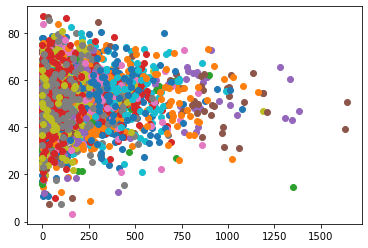

In [93]:
model = AffinityPropagation(damping=0.8)
X = tp_df.drop(["Cens"], axis=1)
Y = tp_df["Time"]
X = pd.get_dummies(X)
X = X.to_numpy()
model.fit(X)
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
count = 0
for cluster in clusters:
    # get row indexes for samples with this cluster
    count+=1
    row_ix = where(yhat == cluster)
    print("Cluster: ",count, "Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
#print("Total Cluster")
pyplot.show()

In [112]:
model = AffinityPropagation(damping=0.9) # use other hyperparameter, the cluster does not merge
X = tp_df.drop(["Cens"], axis=1)
Y = tp_df["Time"]
X = pd.get_dummies(X)
X = X.to_numpy()

In [113]:
model.fit(X)
yhat = model.predict(X)

D:\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Cluster:  1 Indexes [  94  123  136  175  198  199  200  437  511  533  562  642  691  755
  838  844  882  900  995 1074 1200 1274 1296 1364 1523 1716 1900 2019
 2045 2134 2354 2378 2612 2798 2911 2982 3060 3169 3244 3397 3534 3549
 3565 3595 3648 3687 3713 3860 3867 3895 3902]
Cluster:  2 Indexes [ 154  162  300  822  880  930 1008 1509 1667 1946 2051 2098 2590 2977
 3090 3249 3293 3298 3479 3619 3669 3956]
Cluster:  3 Indexes [323]
Cluster:  4 Indexes [  46   56  179  347  387  479  501  546  557  566  574  631  647  699
 1299 1359 1363 1555 2062 2079 3001 3442 3622 3625 3776]
Cluster:  5 Indexes [   3   11   31   33   43   45   66   71   81   91   95  101  126  134
  148  151  170  190  209  216  246  261  266  272  276  281  289  296
  297  303  311  321  326  334  348  351  383  403  420  443  476  507
  517  521  526  531  532  543  551  588  592  607  609  634  649  660
  674  676  681  686  706  711  747  768  791  793  803  834  845  872
  889  915  938  939  942  963  982  9

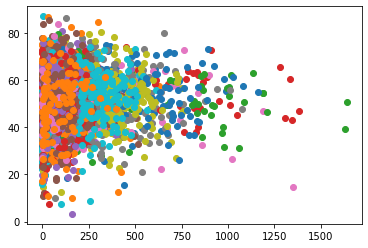

In [114]:
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
count = 0
for cluster in clusters:
    # get row indexes for samples with this cluster
    count+=1
    row_ix = where(yhat == cluster)
    print("Cluster: ",count, "Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
#print("Total Cluster")
pyplot.show()

# Agglomerative Clustering

In [71]:
from sklearn.cluster import AgglomerativeClustering

Cluster:  1 Indexes [  22   29  104  124  165  237  314  345  360  427  499  608  721  723
  746  819  820  924  986 1160 1354 1436 1473 1542 1550 1618 1652 1686
 1868 1921 2027 2033 2164 2199 2259 2337 2365 2557 2638 2685 2736 2877
 2991 3098 3111 3152 3167 3197 3210 3252 3277 3295 3365 3389 3404 3416
 3443 3641 3661 3721 3768 3804 3894 3934 3940]
Cluster:  2 Indexes [  23   48   59   72   80  110  140  141  180  231  233  234  239  250
  264  274  279  282  332  333  341  354  364  373  390  398  456  460
  484  487  489  516  550  555  578  581  625  643  654  666  671  680
  690  694  714  717  731  732  759  787  788  795  797  827  859  862
  909  951  975  977  981  983  987 1001 1013 1055 1081 1086 1100 1110
 1133 1143 1146 1157 1167 1170 1171 1175 1178 1192 1239 1280 1288 1302
 1308 1356 1372 1382 1398 1403 1430 1443 1477 1488 1492 1529 1531 1536
 1567 1570 1577 1584 1596 1606 1646 1680 1685 1700 1729 1735 1743 1746
 1765 1776 1794 1801 1820 1853 1860 1865 1867 1876 1905 1951 

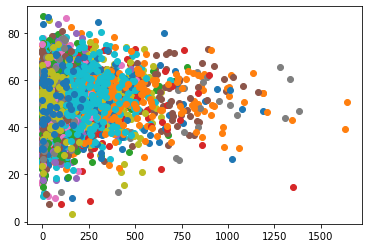

In [107]:
hierarchical_model = AgglomerativeClustering(n_clusters=42)
yhat = hierarchical_model.fit_predict(X)
clusters = unique(yhat)
count = 0
# create scatter plot for samples from each cluster
for cluster in clusters:
    count+=1
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("Cluster: ",count, "Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Kmeans

Cluster:  1 Indexes [   3   11   33   43   45   60   66   71   81   91  101  126  134  148
  170  190  216  261  265  266  276  278  289  296  297  303  311  321
  334  351  383  403  420  438  443  476  507  517  521  526  531  532
  543  551  588  607  634  649  674  676  686  706  711  747  768  791
  803  834  845  915  938  939  942  963  982  991 1003 1007 1038 1047
 1075 1076 1094 1138 1139 1144 1172 1185 1201 1218 1231 1233 1240 1276
 1281 1294 1312 1334 1410 1446 1497 1505 1556 1561 1579 1583 1614 1617
 1624 1635 1638 1648 1668 1704 1763 1841 1845 1851 1878 1890 1943 1944
 1950 1952 2007 2015 2060 2064 2089 2101 2105 2120 2129 2132 2161 2213
 2215 2227 2236 2264 2275 2375 2390 2398 2412 2431 2438 2454 2479 2482
 2487 2498 2507 2510 2515 2525 2554 2601 2607 2615 2623 2632 2663 2672
 2673 2674 2676 2695 2710 2714 2743 2754 2773 2786 2789 2834 2848 2852
 2858 2859 2883 2898 2907 2913 2968 2975 2984 3012 3037 3074 3077 3099
 3128 3160 3179 3201 3217 3226 3237 3303 3314 3329 3331 3

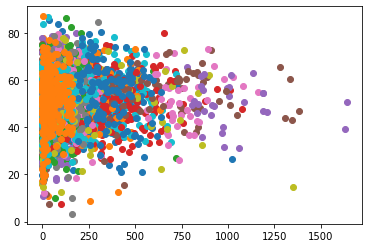

In [102]:
from sklearn.cluster import KMeans
km_model = KMeans(n_clusters=42, random_state = 42)
yhat = km_model.fit_predict(X)
clusters = unique(yhat)
count = 0
# create scatter plot for samples from each cluster
for cluster in clusters:
    count+=1
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("Cluster: ",count,"Indexes", row_ix[0])
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# DBSCAN

Cluster:  1
Cluster:  2
Cluster:  3
Cluster:  4
Cluster:  5
Cluster:  6
Cluster:  7
Cluster:  8
Cluster:  9
Cluster:  10
Cluster:  11
Cluster:  12
Cluster:  13
Cluster:  14
Cluster:  15
Cluster:  16
Cluster:  17
Cluster:  18


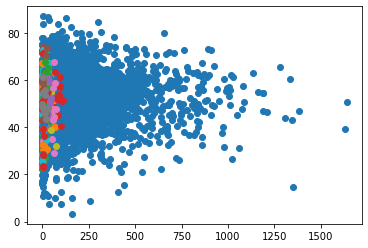

In [88]:
from sklearn.cluster import DBSCAN
db_model = DBSCAN(eps=30, min_samples=10)
yhat = db_model.fit_predict(X)
clusters = unique(yhat)
count = 0
# create scatter plot for samples from each cluster
for cluster in clusters:
    count+=1
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("Cluster: ",count)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Therefore, Dbscan is not reliable

# Gaussian Mixture Model

Cluster:  1
Cluster:  2
Cluster:  3
Cluster:  4
Cluster:  5
Cluster:  6
Cluster:  7
Cluster:  8
Cluster:  9
Cluster:  10
Cluster:  11
Cluster:  12
Cluster:  13
Cluster:  14
Cluster:  15
Cluster:  16
Cluster:  17
Cluster:  18
Cluster:  19
Cluster:  20
Cluster:  21
Cluster:  22
Cluster:  23
Cluster:  24
Cluster:  25
Cluster:  26
Cluster:  27
Cluster:  28
Cluster:  29
Cluster:  30
Cluster:  31
Cluster:  32
Cluster:  33
Cluster:  34
Cluster:  35
Cluster:  36
Cluster:  37
Cluster:  38
Cluster:  39
Cluster:  40
Cluster:  41
Cluster:  42


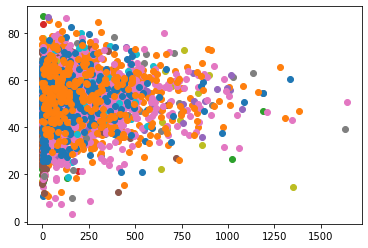

In [115]:
from sklearn.mixture import GaussianMixture
GM_model = GaussianMixture(n_components=42,random_state = 42)
yhat = GM_model.fit_predict(X)
clusters = unique(yhat)
count = 0
# create scatter plot for samples from each cluster
for cluster in clusters:
    count+=1
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("Cluster: ",count)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()